In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

df = pd.read_csv('auto-mpg.csv', header=0)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null int64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null int64
acceleration    406 non-null float64
model_year      406 non-null int64
origin          406 non-null int64
car             406 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.6+ KB


# Analyzing mpg by plotting

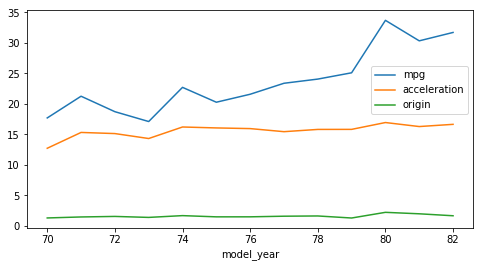

In [18]:

# show the relationship between 
# average mpg/weight and model year
import matplotlib.pyplot as plt
df.groupby('model_year')["mpg","acceleration","origin"].mean()\
.plot(kind='line', figsize=(8,4))\
.legend(loc=4, bbox_to_anchor=(1, 0.5));  # set legend
plt.show()
%matplotlib inline


# Web Scraping from Rottentomatoes

In [19]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

def getReviews(movie_id):
    reviews=[] # variable to hold all reviews
    page_url="https://www.rottentomatoes.com/m/"+movie_id+"/reviews/?type=top_critics"
    page = requests.get(page_url)
    if page.status_code==200:
# insert your code to process page content
        soup = BeautifulSoup(page.content, 'html.parser')  

# soup object stands for the **root** node of the html document tree

# print soup object nicely


        divs=soup.select("section#content > div.panel-body.content_body > div#reviews > div.content > div.review_table > div.row.review_table_row")
        

        for idx, div in enumerate(divs):
            # for testing you can print idx, div
            #print idx, div 

            # initiate the variable for each period
            name=None
            date=None
            desc=None
            score=None

            # get title
            p_title=div.select("div.col-xs-8  div a")

            # test if "period-name" indeed exists
            # before you get the text
            if p_title!=[]:
                name=p_title[0].get_text()

            p_date=div.select("div.col-xs-16.review_container div div.review_date.subtle.small ")
            if p_date!=[]:
                date=p_date[0].get_text()

            # get description
            p_desc=div.select("div.col-xs-16.review_container div div  div.the_review")
            if p_desc!=[]:
                desc=p_desc[0].get_text()

            # NOTE:don't leave the gap in tags
            p_score=div.select("div.col-xs-16.review_container div div div.small.subtle")
            if p_score!=[]:
                score=p_score[0].get_text()

            # add title, description, and temperature as a tuple into the list
            reviews.append((name, date, desc, score))
            #print((name, date, desc, score))





        return reviews
#best practice to test your class
# if your script is exported as a module,
# the following part is ignored
# this is equivalent to main() in Java
if __name__ == "__main__":

    movie_id='finding_dory'
    reviews=getReviews(movie_id)
print(reviews)

[('Matthew Rozsa', ' August 3, 2017', ' Who would have thought one of the deepest films ever made about learning disabilities would star a talking blue fish?', ' Full Review | Original Score: 3.5/4'), ('Peter Bradshaw', ' July 28, 2016', " It's watchable, with all the wonderful animation technique that we are in danger of taking for granted. But it's basically a footnote or retread of the movie which melted everyone's heart 12 years ago.", ' Full Review | Original Score: 3/5'), ('Bruce Diones', ' June 27, 2016', ' While not as visually dazzling as its predecessor, the film is still colorful and immersive; the script, while predictable, puts an engaging spin on the issues of home and identity.', ' Full Review '), ('Christy Lemire', ' June 26, 2016', " It's gorgeous. It's lively. It's got terrific performances from a strong voice cast. It's emotionally affecting without being heavy-handed.", ' Full Review | Original Score: 3/4'), ('Zach Schonfeld', ' June 23, 2016', " Dory's visual palet

# Bit Different Way of Scraping same content

In [20]:
def getReviews(movie_id):
    reviews = []
   
    page_url = 'https://www.rottentomatoes.com/m/'+movie_id+'/reviews/?type=top_critics'
    page = requests.get(page_url)
    if page.status_code == 200:
        soup = BeautifulSoup(page.content, 'html.parser')
        review_table = soup.select('section#content > div.panel-body.content_body > div#reviews > div.content > div.review_table > div.row.review_table_row')
        for idx,div in enumerate(review_table):
            ReviewerName = None
            ReviewDate = None
            ReviewDesc = None
            ReviewScore = None
            
            Name = div.select('div.col-xs-8 > div.col-sm-13.col-xs-24.col-sm-pull-4.critic_name > a')
            Date = div.select('div.col-xs-16.review_container > div.review_area > div.review_date.subtle.small')
            Desc = div.select('div.col-xs-16.review_container > div.review_area > div.review_desc > div.the_review')
            Score = div.select('div.col-xs-16.review_container > div.review_area > div.review_desc > div.small.subtle')
            if Name[0]!=[]:
                ReviewerName = Name[0].get_text()
            if Date[0]!=[]:
                ReviewDate = Date[0].get_text()
            if Desc[0]!=[]:
                ReviewDesc = Desc[0].get_text()
            if Score[0]!=[]:
                temp = Score[0].get_text()
                
            reviews.append((ReviewerName,ReviewDate,ReviewDesc,ReviewScore))
    return reviews            

if __name__ == "__main__":
       
        movie_id='finding_dory'
        reviews=getReviews(movie_id)
print(reviews)

[('Matthew Rozsa', ' August 3, 2017', ' Who would have thought one of the deepest films ever made about learning disabilities would star a talking blue fish?', None), ('Peter Bradshaw', ' July 28, 2016', " It's watchable, with all the wonderful animation technique that we are in danger of taking for granted. But it's basically a footnote or retread of the movie which melted everyone's heart 12 years ago.", None), ('Bruce Diones', ' June 27, 2016', ' While not as visually dazzling as its predecessor, the film is still colorful and immersive; the script, while predictable, puts an engaging spin on the issues of home and identity.', None), ('Christy Lemire', ' June 26, 2016', " It's gorgeous. It's lively. It's got terrific performances from a strong voice cast. It's emotionally affecting without being heavy-handed.", None), ('Zach Schonfeld', ' June 23, 2016', " Dory's visual palette is such a joy to look at, drawing on the deep blues and greens of the underwater expanse and ocean-dwellin